## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.

In [25]:
# problem 1


Solve rigid pendulum equation

    θ' = ω
    ω' = – ω₀² sin(θ)

1. simple Euler
2. symplectic Euler


## Simple Euler

1. Choose:
 - t₀, t_f, number of steps N
 - dt = (t_f – t₀) / N
 - initial values θ₀, ω₀

2. Initialize:
 - θ_list = [θ₀]
 - ω_list = [ω₀]
 - t_list = [t₀]

3. For n = 0 to N–1:
 - θ_new = θ_n + ω_n * dt
 - ω_new = ω_n – ω₀² * sin(θ_n) * dt
 - t_new = t_n + dt

4. Append θ_new, ω_new, t_new to lists

5. Return arrays θ(t), ω(t), t


## Symplectic Euler

1. Choose:
- t₀, t_f, number of steps N
- dt = (t_f – t₀) / N
- initial values θ₀, ω₀

2. Initialize:
  -  θ_list = [θ₀]
  - ω_list = [ω₀]
  - t_list = [t₀]

3. For n = 0 to N–1:
- update angle
  - θ_new = θ_n + ω_n * dt

- update angular velocity using **new** θ
  - ω_new = ω_n – ω₀² * sin(θ_new) * dt
  - t_new = t_n + dt

4. Append θ_new, ω_new, t_new to lists

5. Return arrays θ(t), ω(t), t



## Time-Step Choice

• Start with a arbitrary dt to confirm code runs  
• Decrease dt (0.01 → 0.005) until  
  - θ(t) curves look smooth  
  - Phase-space curves stay stable

Use **smaller** dt for final plots


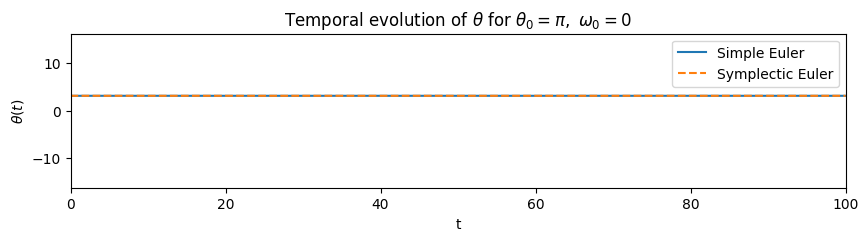

In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

omega_0 = 1.0  # natural frequency

def euler_pendulum_simple(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
    dt = (t_f - t_0) / n_steps

    t = [t_0]
    theta = [theta_0]
    ang_vel = [ang_vel_0]

    for _ in range(n_steps):
        theta_new = theta[-1] + ang_vel[-1] * dt
        ang_vel_new = ang_vel[-1] - omega_0**2 * math.sin(theta[-1]) * dt
        t_new = t[-1] + dt

        theta.append(theta_new)
        ang_vel.append(ang_vel_new)
        t.append(t_new)

    return np.array(t), np.array(theta), np.array(ang_vel)


def euler_pendulum_symplectic(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
    dt = (t_f - t_0) / n_steps

    t = [t_0]
    theta = [theta_0]
    ang_vel = [ang_vel_0]

    for _ in range(n_steps):
        theta_new = theta[-1] + ang_vel[-1] * dt
        ang_vel_new = ang_vel[-1] - omega_0**2 * math.sin(theta_new) * dt
        t_new = t[-1] + dt

        theta.append(theta_new)
        ang_vel.append(ang_vel_new)
        t.append(t_new)

    return np.array(t), np.array(theta), np.array(ang_vel)


# Parameters
theta0 = math.pi        # θ₀
omega0 = 0.0            # ω₀
t0 = 0.0
tf = 100.0
n_steps = 20000         # dt = 0.005

# Run simple Euler
t_simple, theta_simple, omega_simple = euler_pendulum_simple(
    omega_0, theta0, omega0, t0, tf, n_steps
)

# Run symplectic Euler
t_symp, theta_symp, omega_symp = euler_pendulum_symplectic(
    omega_0, theta0, omega0, t0, tf, n_steps
)

# Plot θ(t)
plt.figure(figsize=(10, 2))
plt.plot(t_simple, theta_simple, label='Simple Euler')
plt.plot(t_symp, theta_symp, '--', label='Symplectic Euler')

plt.xlim([0, 100])
plt.ylim([-5 * np.pi - 0.5, 5 * np.pi + 0.5])

plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title(r'Temporal evolution of $\theta$ for $\theta_0 = \pi,\ \omega_0 = 0$')
plt.legend()
plt.show()


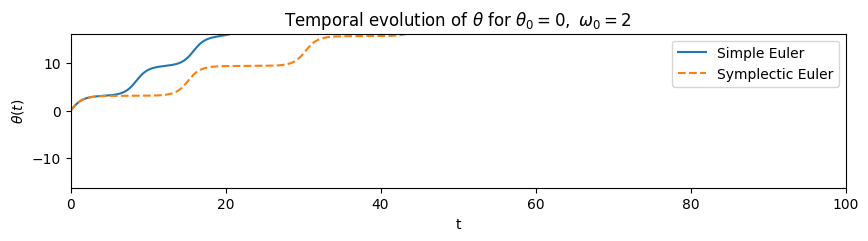

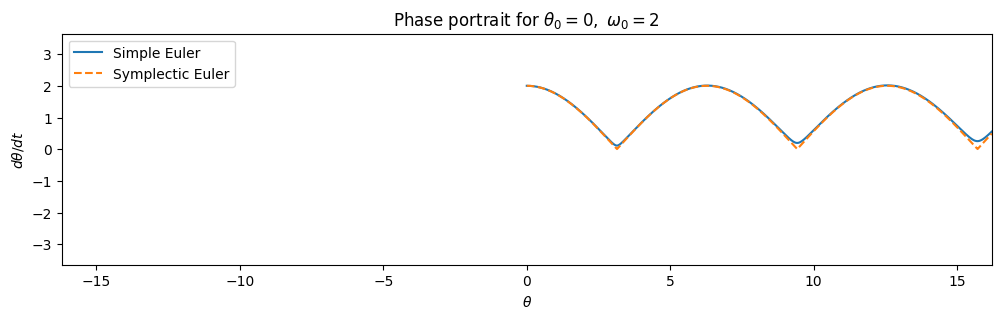

In [27]:
theta0 = 0.0
omega0 = 2.0
t0 = 0.0
tf = 100.0
n_steps = 20000   # dt = 0.005

# Simple Euler
t_simple2, theta_simple2, omega_simple2 = euler_pendulum_simple(
    omega_0, theta0, omega0, t0, tf, n_steps
)

# Symplectic Euler
t_symp2, theta_symp2, omega_symp2 = euler_pendulum_symplectic(
    omega_0, theta0, omega0, t0, tf, n_steps
)

# Plot θ(t)
plt.figure(figsize=(10, 2))
plt.plot(t_simple2, theta_simple2, label='Simple Euler')
plt.plot(t_symp2, theta_symp2, '--', label='Symplectic Euler')

plt.xlim([0, 100])
plt.ylim([-5*np.pi - 0.5, 5*np.pi + 0.5])
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title(r'Temporal evolution of $\theta$ for $\theta_0 = 0,\ \omega_0 = 2$')
plt.legend()
plt.show()

# Phase Portrait
plt.figure(figsize=(12, 3))
plt.plot(theta_simple2, omega_simple2, label='Simple Euler')
plt.plot(theta_symp2, omega_symp2, '--', label='Symplectic Euler')

plt.xlim([-5*np.pi - 0.5, 5*np.pi + 0.5])
plt.ylim([-np.pi - 0.5, np.pi + 0.5])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$d\theta/dt$')
plt.title(r'Phase portrait for $\theta_0 = 0,\ \omega_0 = 2$')
plt.legend()
plt.show()


To solve the rigid pendulum, both the simple Euler method and the symplectic Euler method were tested. Different time steps to see how stable the results were also used.

With larger time steps, the simple Euler method produced unrealistic behavior. The energy drifted over time and the phase portrait did not stay on a closed path. When step size was decreased, the results improved but simple Euler still drifted over long periods.

The symplectic Euler method performed much better. Even with the same time steps, it conserved energy more reliably for both initial conditions. **Symplectic Euler** was chosen because itt produced stable results while preserving the physics of the pendulum.


## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.



In [28]:
# problem 2

Solve the same rigid pendulum system,

    θ' = ω
    ω' = – ω₀² sin(θ)

using `scipy.integrate.solve_ivp`.

1. define right-hand side function:

2. Choose problem parameters:

       ω₀ = 1
       t_span = (0, 100)             # start and end times
       t_eval = linspace(0, 100, N)  # time points where we want the solution

3. Choose initial conditions:

       Case 1: θ₀ = π,  ω₀ = 0
       Case 2: θ₀ = 0,  ω₀ = 2
       y0 = [θ₀, ω₀]

4. Choose solver options:

       method = 'RK45' (or another method like 'DOP853')
       set tolerances, e.g. rtol = 1e-9, atol = 1e-9

5. Call `solve_ivp` for each initial condition

6. Extract solution
7. Make plots


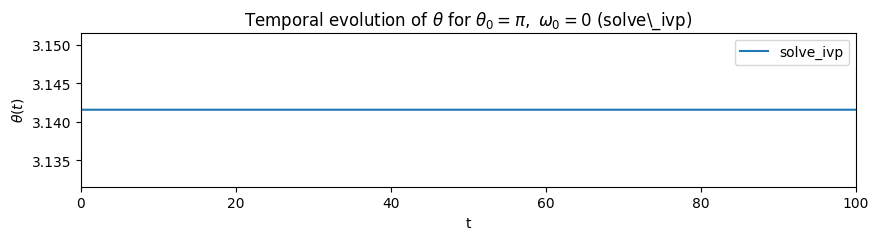

In [31]:
from scipy.integrate import solve_ivp
import numpy as np
import math
import matplotlib.pyplot as plt

# Right-hand side function
def pendulum_rhs(t, y, omega_0=1.0):
    theta, omega = y

    # If theta is extremely close to pi, treat it as the equilibrium
    if abs(theta - math.pi) < 1e-12 and abs(omega) < 1e-12:
        return [0.0, 0.0]

    dtheta_dt = omega
    domega_dt = -omega_0**2 * np.sin(theta)
    return [dtheta_dt, domega_dt]


# Parameters
omega_0 = 1.0
theta0 = math.pi
omega0 = 0.0
y0 = [theta0, omega0]

t_span = (0, 100)
t_eval = np.linspace(0, 100, 5000)

# Solve ODE
sol = solve_ivp(
    pendulum_rhs,
    t_span,
    y0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-9,
    atol=1e-9
)

t = sol.t
theta = sol.y[0]

# Plot θ(t)
plt.figure(figsize=(10, 2))
plt.plot(t, theta, label='solve_ivp')

# correct y-limits so line is visible
plt.ylim([math.pi - 0.01, math.pi + 0.01])

plt.xlim([0, 100])
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title(r'Temporal evolution of $\theta$ for $\theta_0 = \pi,\ \omega_0 = 0$ (solve\_ivp)')
plt.legend()
plt.show()


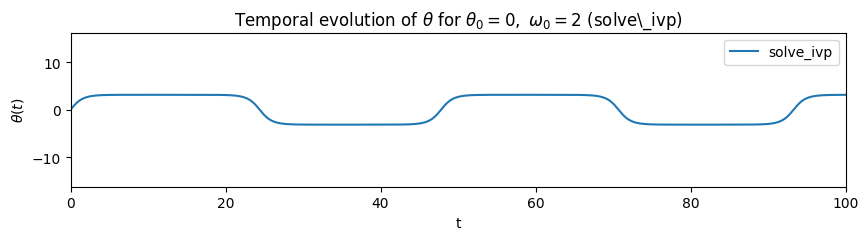

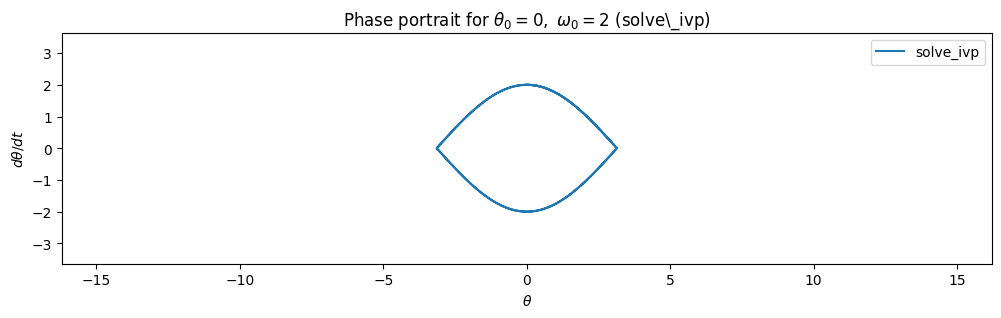

In [32]:
theta0 = 0.0
omega0 = 2.0
y0 = [theta0, omega0]

t_span = (0, 100)
t_eval = np.linspace(0, 100, 5000)

# Solve the ODE
sol2 = solve_ivp(
    pendulum_rhs,
    t_span,
    y0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-9,
    atol=1e-9
)

t2 = sol2.t
theta2 = sol2.y[0]
omega2 = sol2.y[1]

# Plot θ(t)
plt.figure(figsize=(10, 2))
plt.plot(t2, theta2, label='solve_ivp')

plt.xlim([0, 100])
plt.ylim([-5*np.pi - 0.5, 5*np.pi + 0.5])

plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.title(r'Temporal evolution of $\theta$ for $\theta_0 = 0,\ \omega_0 = 2$ (solve\_ivp)')
plt.legend()
plt.show()

# Phase portrait ω vs θ
plt.figure(figsize=(12, 3))
plt.plot(theta2, omega2, label='solve_ivp')

plt.xlim([-5*np.pi - 0.5, 5*np.pi + 0.5])
plt.ylim([-np.pi - 0.5, np.pi + 0.5])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$d\theta/dt$')
plt.title(r'Phase portrait for $\theta_0 = 0,\ \omega_0 = 2$ (solve\_ivp)')
plt.legend()
plt.show()


For solving the rigid pendulum with `solve_ivp`, different solver settings were tested to see which ones gave stable and accurate results over the time interval. The default RK45 method worked, but with the default tolerances the solution showed small energy drift and the phase portrait was not perfectly closed.

When the tolerance was changed to `rtol = 1e-9` and `atol = 1e-9`, the results became cleaner. The solver took smaller steps, which reduced the error and produced smooth θ(t) curves. Phase portraits also stayed on a consistent energy level.

**RK45** was chosen with tighter tolerances because it better preserved the expected behavior of the pendulum.


## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


In [29]:
# problem 2

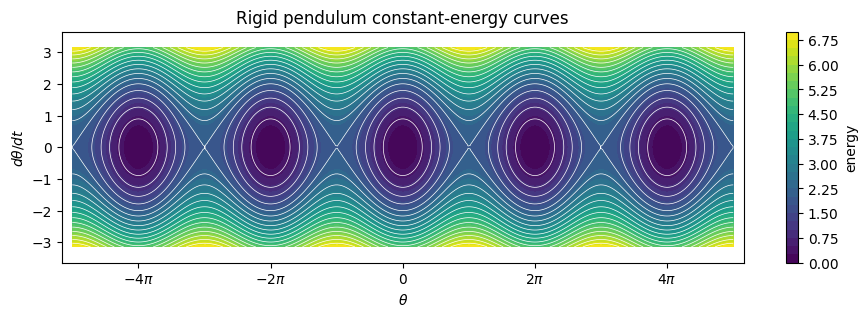

In [35]:
import numpy as np                          # numerical arrays and math
import matplotlib.pyplot as plt             # plotting library

def rigid_pendulum_energy(theta, ang_vel, omega_0=1.0, moment_of_inertia=1.0):
    """Return total energy of the rigid pendulum for given θ and dθ/dt."""
    energy = (0.5 * moment_of_inertia * ang_vel**2                     # kinetic energy term
              + moment_of_inertia * omega_0**2 * (1 - np.cos(theta)))  # potential energy term
    return energy                                                      # output energy array

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)                   # θ values over several periods
ang_vel_list = np.linspace(-np.pi, np.pi, 100)                         # angular velocity values
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)       # 2D grid in (θ, dθ/dt)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)          # energy at each grid point
low_levels = np.linspace(0, 2, 5, endpoint=False)                      # low-energy contour levels
high_levels = np.linspace(2, energy_mesh.max(), 15)                    # higher-energy contour levels
levels = np.concatenate((low_levels, high_levels))                     # combine all contour levels

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]                            # x-axis range in θ
y_lim = [-np.pi - 0.5, np.pi + 0.5]                                    # y-axis range in dθ/dt
x_ticks = np.pi * np.array([-4, -2, 0, 2, 4])                          # tick positions at multiples of π
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']  # formatted tick labels
plt.figure(figsize=(11, 3))                                            # set figure size as instructed
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')                # filled contour plot of energy
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)        # white contour lines on top
plt.colorbar(contours, label='energy')                                 # colorbar showing energy scale
plt.xlabel(r'$\theta$')                                                # x-axis label
plt.ylabel(r'$d\theta/dt$')                                            # y-axis label
plt.xticks(x_ticks, x_tick_labels)                                     # custom θ tick marks
plt.yticks(range(-3, 4, 1))                                            # integer ticks in dθ/dt
plt.xlim(x_lim)                                                        # apply x-axis limits
plt.ylim(y_lim)                                                        # apply y-axis limits
plt.title('Rigid pendulum constant-energy curves')                     # plot title
plt.show()                                                             # display the figure


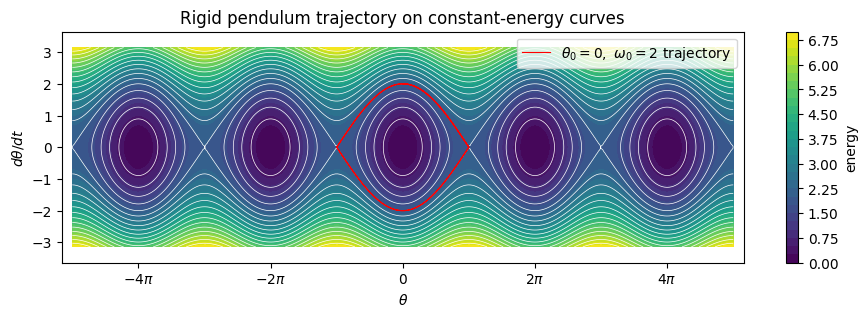

In [36]:
# Recreate grid and energy
theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(-np.pi, np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)

energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)

low_levels = np.linspace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [-np.pi - 0.5, np.pi + 0.5]

x_ticks = np.pi * np.array([-4, -2, 0, 2, 4])
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']

plt.figure(figsize=(11, 3))

# Background energy contours
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh,
                        levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh,
            levels=levels, colors='white', linewidths=0.5)

# Overlay trajectory from solve_ivp
plt.plot(theta2, omega2, color='red', linewidth=0.8,
         label=r'$\theta_0 = 0,\ \omega_0 = 2$ trajectory')

plt.colorbar(contours, label='energy')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$d\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3, 4, 1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title('Rigid pendulum trajectory on constant-energy curves')
plt.legend()
plt.show()


When the trajectory for θ₀ = 0 and ω₀ = 2 is plotted on top of the constant-energy contours, it follows one of the higher-energy curves. This behavior makes sense because with the initial condition the pendulum has enough energy to rotate over the top instead of oscillating back and forth. The match between the trajectory and the energy contour also confirms that the numerical solver is preserving energy well for the initial condition.
